In [59]:
import pandas as pd 
data=pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\91931\AppData\Local\Temp\ipykernel_1396\210158217.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Ridge Regression - MSE: 489721.9405796481, R2: 0.9058663563035667
Lasso Regression - MSE: 488988.6527332957, R2: 0.9060073078336814


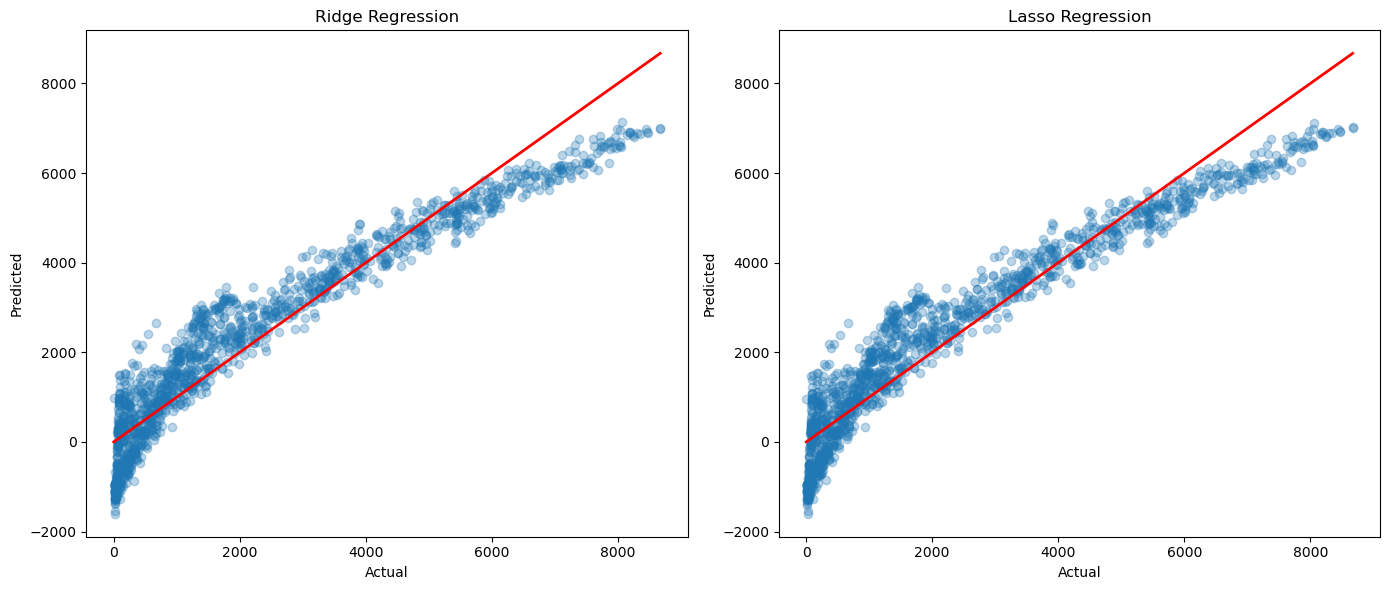

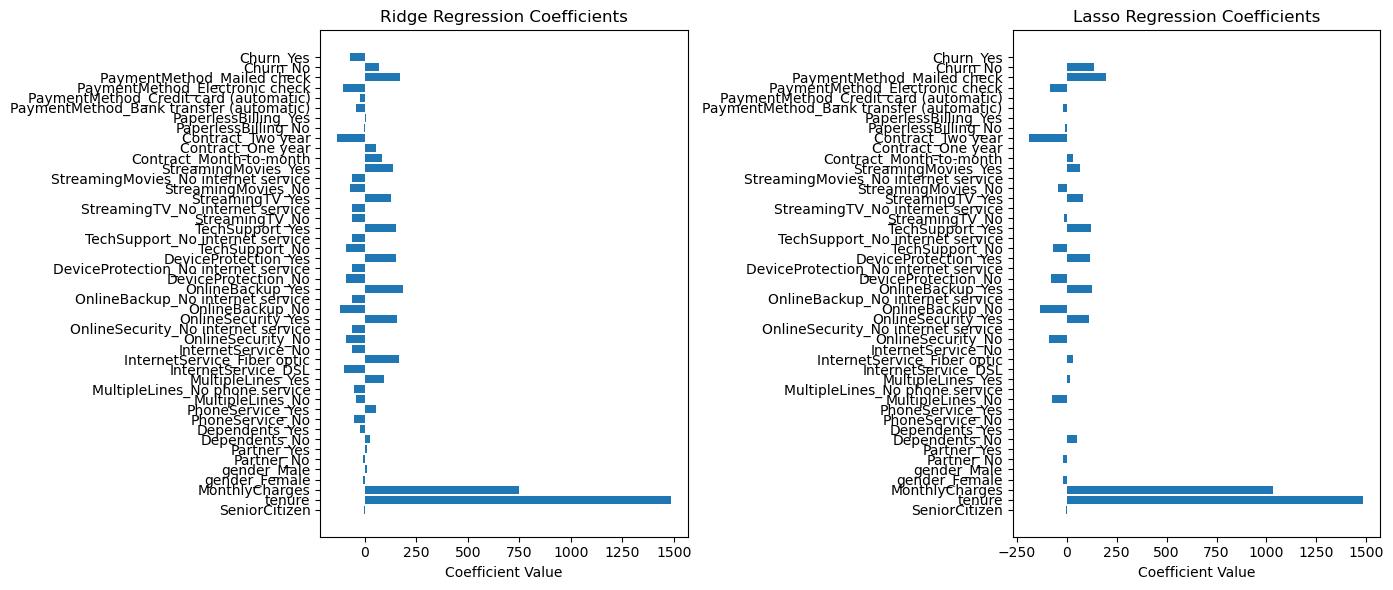

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preprocess the data
data.drop('customerID', axis=1, inplace=True)
data = data.fillna(method='ffill')

# Convert 'TotalCharges' to numeric, forcing errors to NaN and then filling them with 0
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Separating features and target variable
X = data.drop('TotalCharges', axis=1)
y = data['TotalCharges']

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating pipelines for Ridge and Lasso regression
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('ridge', Ridge(alpha=1.0))])
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('lasso', Lasso(alpha=0.1))])

# Fitting the models
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_ridge = ridge_pipeline.predict(X_test)
y_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluating the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}')
print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}')

# Plotting the results
plt.figure(figsize=(14, 6))

# Plotting Ridge predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')

# Plotting Lasso predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()

# Plotting the coefficients
ridge_model = ridge_pipeline.named_steps['ridge']
lasso_model = lasso_pipeline.named_steps['lasso']

# Getting the feature names after one-hot encoding
feature_names = (numerical_cols + list(ridge_pipeline.named_steps['preprocessor']
                    .transformers_[1][1]
                    .get_feature_names_out(categorical_cols)))

# Plotting Ridge coefficients
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(feature_names, ridge_model.coef_)
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')

# Plotting Lasso coefficients
plt.subplot(1, 2, 2)
plt.barh(feature_names, lasso_model.coef_)
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')

plt.tight_layout()
plt.show()


C:\Users\91931\AppData\Local\Temp\ipykernel_1396\3191125340.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Ridge Regression:
Training - MSE: 468988.4302767169, R²: 0.9084213667298968
Testing - MSE: 489721.9405796481, R²: 0.9058663563035667

Lasso Regression:
Training - MSE: 469051.44366808666, R²: 0.908409062204056
Testing - MSE: 488988.6527332957, R²: 0.9060073078336814


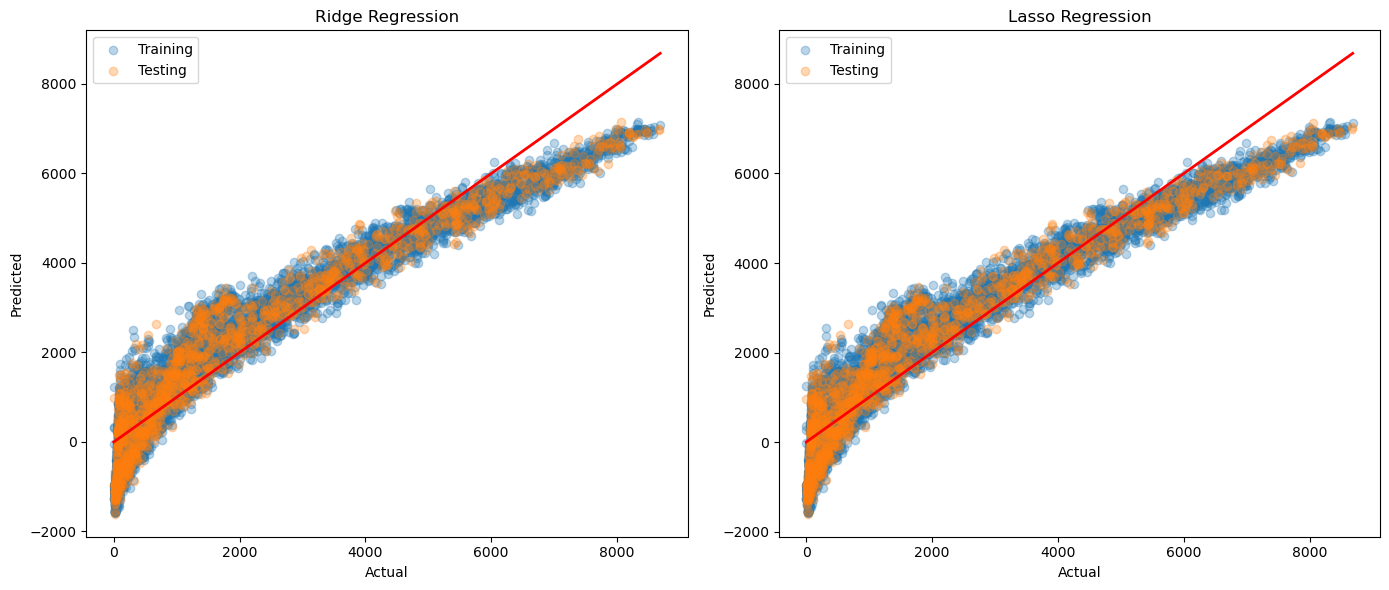

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preprocess the data
data.drop('customerID', axis=1, inplace=True)
data = data.fillna(method='ffill')

# Convert 'TotalCharges' to numeric, forcing errors to NaN and then filling them with 0
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Separating features and target variable
X = data.drop('TotalCharges', axis=1)
y = data['TotalCharges']

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating pipelines for Ridge and Lasso regression
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('ridge', Ridge(alpha=1.0))])
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('lasso', Lasso(alpha=0.1))])

# Fitting the models
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

# Making predictions on both training and test sets
y_train_pred_ridge = ridge_pipeline.predict(X_train)
y_test_pred_ridge = ridge_pipeline.predict(X_test)
y_train_pred_lasso = lasso_pipeline.predict(X_train)
y_test_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluating the models on both training and test sets
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print("Ridge Regression:")
print(f"Training - MSE: {mse_train_ridge}, R²: {r2_train_ridge}")
print(f"Testing - MSE: {mse_test_ridge}, R²: {r2_test_ridge}\n")

print("Lasso Regression:")
print(f"Training - MSE: {mse_train_lasso}, R²: {r2_train_lasso}")
print(f"Testing - MSE: {mse_test_lasso}, R²: {r2_test_lasso}")

# Plotting the results
plt.figure(figsize=(14, 6))

# Ridge Regression predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_ridge, alpha=0.3, label='Training')
plt.scatter(y_test, y_test_pred_ridge, alpha=0.3, label='Testing')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')
plt.legend()

# Lasso Regression predictions
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred_lasso, alpha=0.3, label='Training')
plt.scatter(y_test, y_test_pred_lasso, alpha=0.3, label='Testing')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd


# Display the first few rows of the dataset
print(data.head())

# Display summary statistics of the dataset
print(data.describe(include='all'))

# Display information about the dataset (data types, non-null values)
print(data.info())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

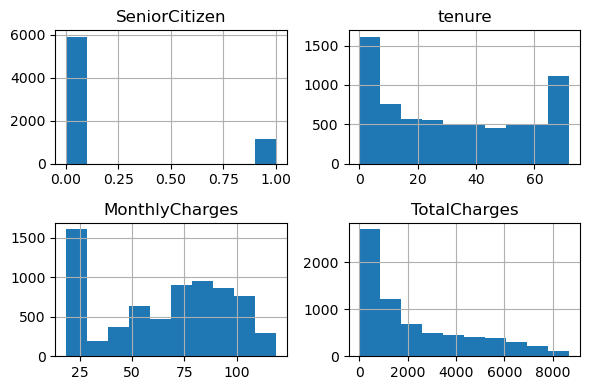

ValueError: could not convert string to float: 'Female'

<Figure size 800x400 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].hist(figsize=(6, 4))
plt.tight_layout()
plt.show()

# Distribution of categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data[col])
    plt.title(col)
    plt.show()


                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.103006
tenure               0.016567  1.000000        0.247900      0.826178
MonthlyCharges       0.220173  0.247900        1.000000      0.651174
TotalCharges         0.103006  0.826178        0.651174      1.000000


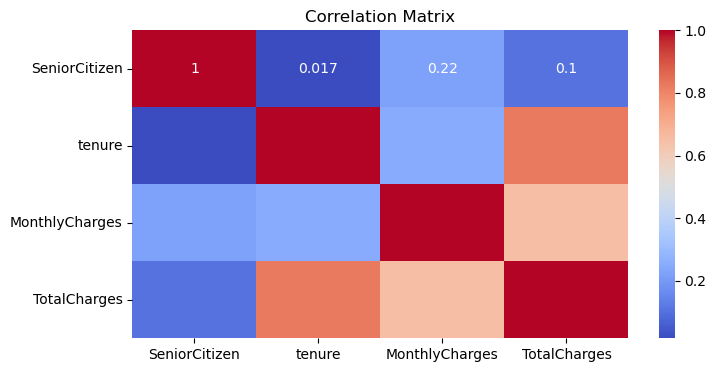

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess the data
data.drop('customerID', axis=1, inplace=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [24]:
# Plotting churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(data['Churn'])
plt.title('Churn Distribution')
plt.show()

# Analyzing churn by categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'{col} by Churn')
    plt.show()

ValueError: could not convert string to float: 'No'

<Figure size 800x600 with 0 Axes>

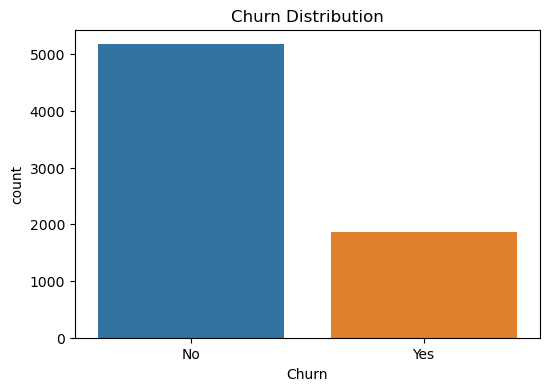

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.103006
tenure               0.016567  1.000000        0.247900      0.826178
MonthlyCharges       0.220173  0.247900        1.000000      0.651174
TotalCharges         0.103006  0.826178        0.651174      1.000000


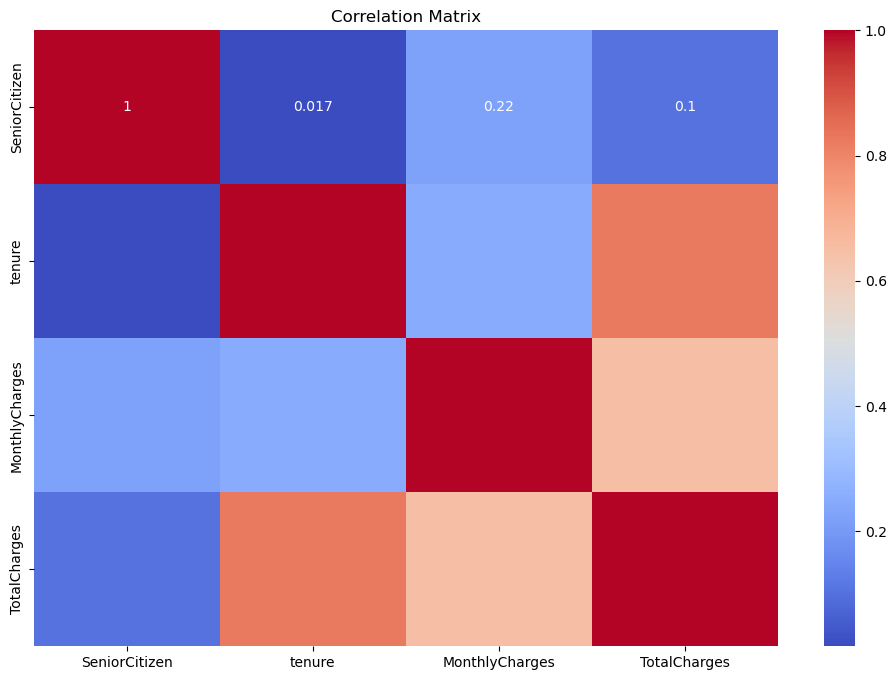

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess the data
data.drop('customerID', axis=1, inplace=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Plotting churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


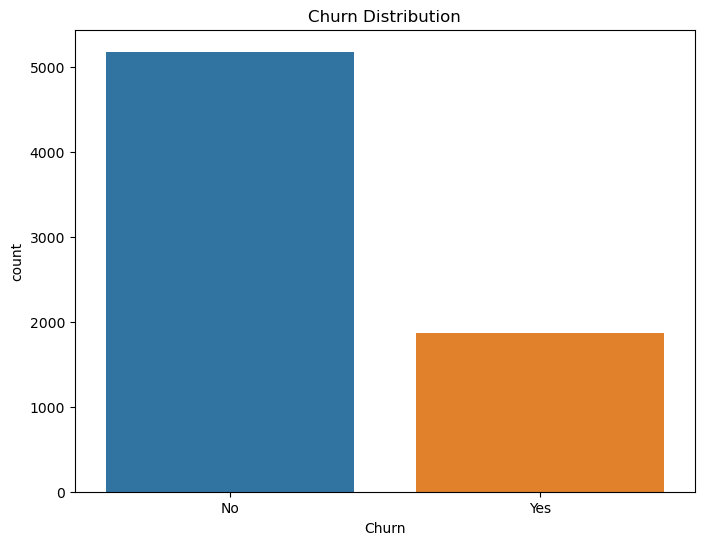

                                       SeniorCitizen    tenure  \
SeniorCitizen                               1.000000  0.016567   
tenure                                      0.016567  1.000000   
MonthlyCharges                              0.220173  0.247900   
TotalCharges                                0.103006  0.826178   
gender_Male                                -0.001874  0.005106   
Partner_Yes                                 0.016479  0.379697   
Dependents_Yes                             -0.211185  0.159712   
PhoneService_Yes                            0.008576  0.008448   
MultipleLines_No phone service             -0.008576 -0.008448   
MultipleLines_Yes                           0.142948  0.331941   
InternetService_Fiber optic                 0.255338  0.019720   
InternetService_No                         -0.182742 -0.039062   
OnlineSecurity_No internet service         -0.182742 -0.039062   
OnlineSecurity_Yes                         -0.038653  0.327203   
OnlineBack

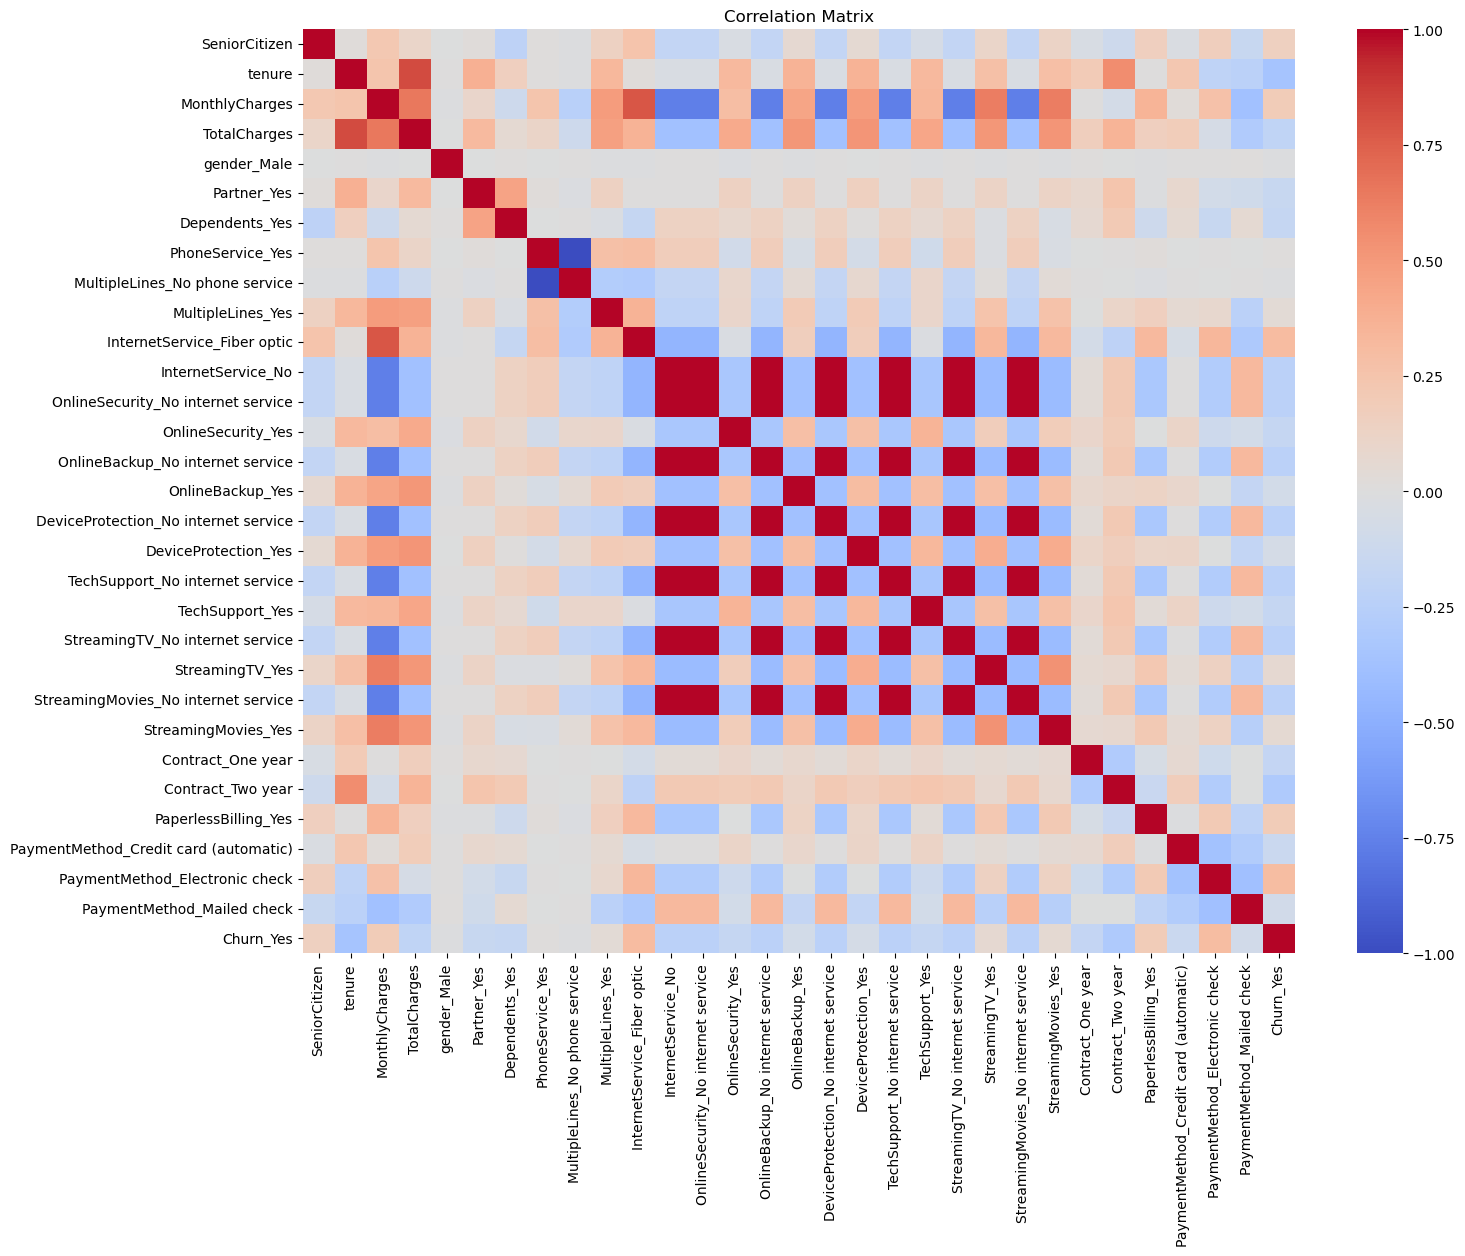

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess the data
data.drop('customerID', axis=1, inplace=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Plotting churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()
print(corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


                                       SeniorCitizen    tenure  \
SeniorCitizen                               1.000000  0.016567   
tenure                                      0.016567  1.000000   
MonthlyCharges                              0.220173  0.247900   
TotalCharges                                0.103006  0.826178   
gender_Male                                -0.001874  0.005106   
Partner_Yes                                 0.016479  0.379697   
Dependents_Yes                             -0.211185  0.159712   
PhoneService_Yes                            0.008576  0.008448   
MultipleLines_No phone service             -0.008576 -0.008448   
MultipleLines_Yes                           0.142948  0.331941   
InternetService_Fiber optic                 0.255338  0.019720   
InternetService_No                         -0.182742 -0.039062   
OnlineSecurity_No internet service         -0.182742 -0.039062   
OnlineSecurity_Yes                         -0.038653  0.327203   
OnlineBack

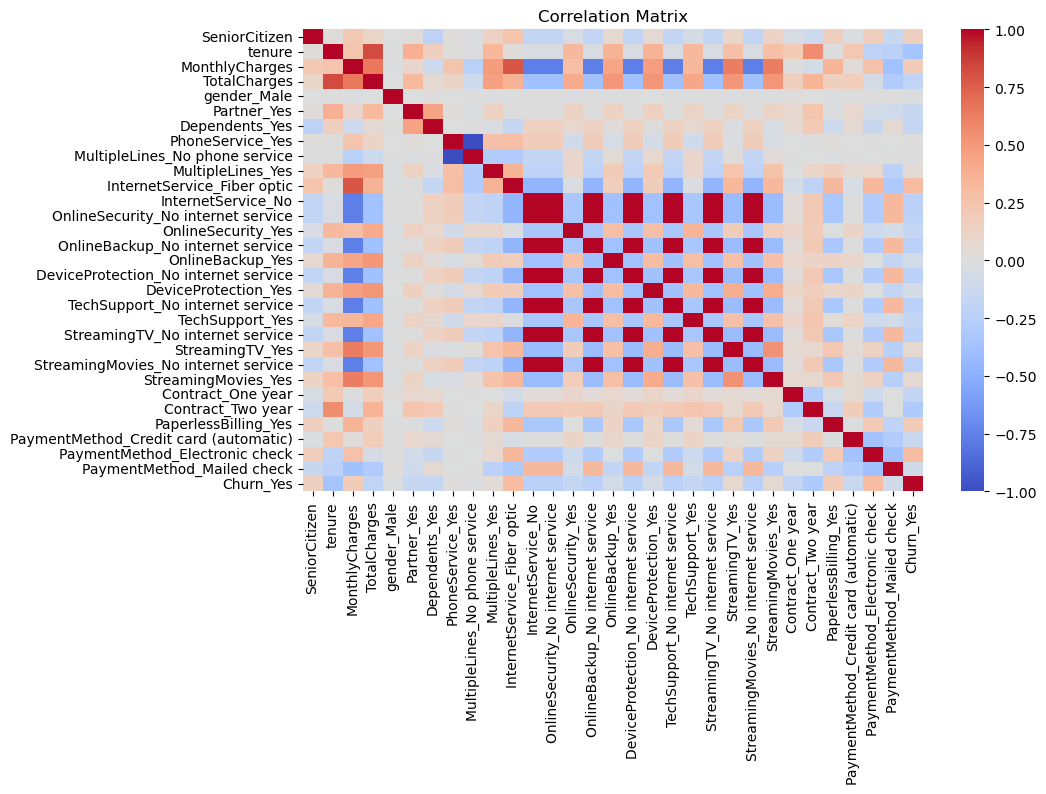

In [31]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()
print(corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


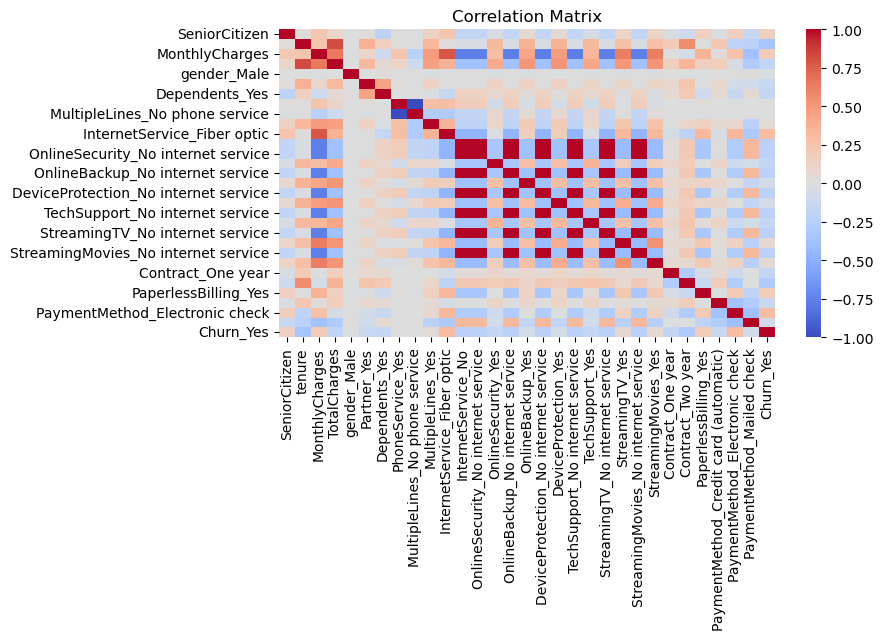

In [54]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\91931\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


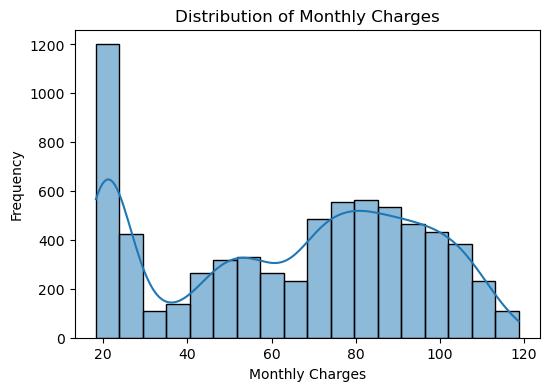

In [35]:
# Distribution of Monthly Charges
plt.figure(figsize=(6, 4))
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


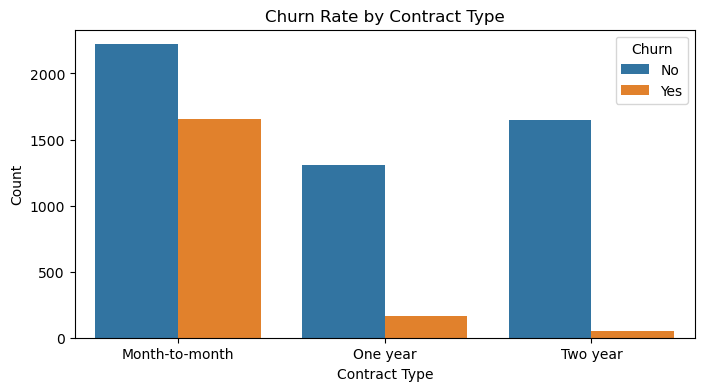

In [37]:
# Churn Rate by Contract Type
plt.figure(figsize=(8, 4))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


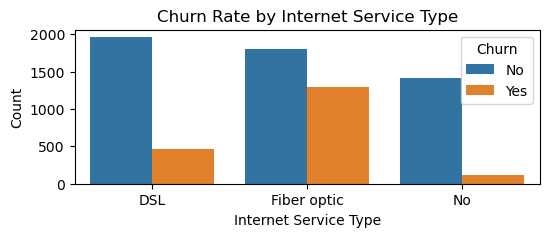

In [51]:
# Churn Rate by Internet Service Type
plt.figure(figsize=(6, 2))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


C:\Users\91931\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


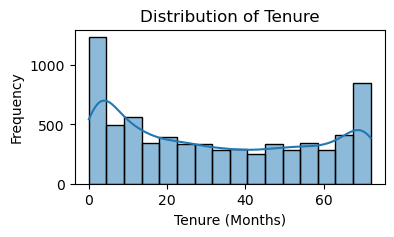

In [52]:
# Tenure Distribution
plt.figure(figsize=(4, 2))
sns.histplot(data['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()


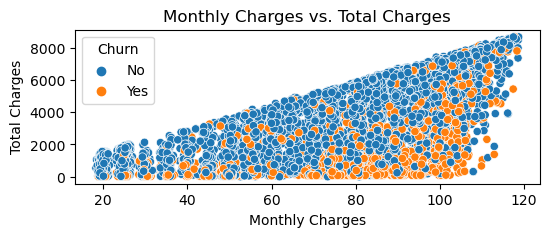

In [44]:
# Monthly Charges vs. Total Charges
plt.figure(figsize=(6, 2))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data)
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.show()


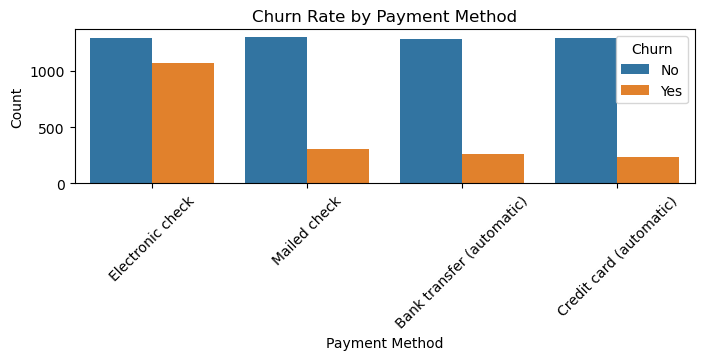

In [47]:
# Churn Rate by Payment Method
plt.figure(figsize=(8, 2))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()


In [48]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in each numerical column
outliers_dict = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(data, column)
    outliers_dict[column] = outliers

# Display the number of outliers detected in each numerical column
outliers_count = {column: len(outliers_dict[column]) for column in numerical_columns}
outliers_count


{'SeniorCitizen': 1142, 'tenure': 0, 'MonthlyCharges': 0, 'TotalCharges': 0}

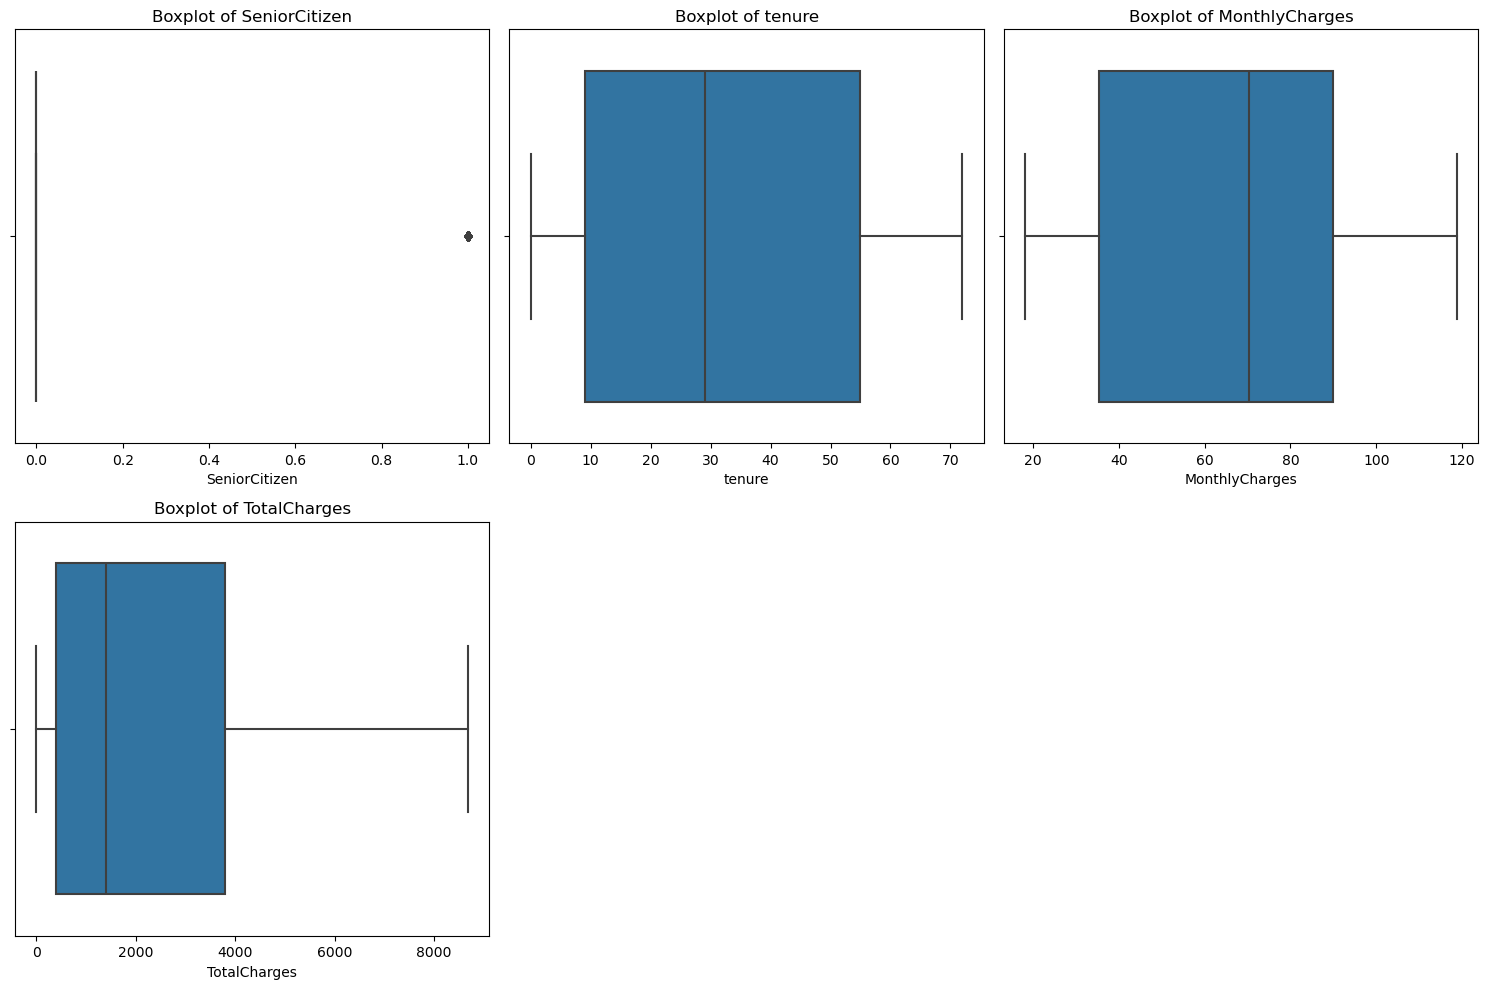

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed for subplots
n_rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)

# Plot boxplots for each numerical column
plt.figure(figsize=(15, n_rows * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()
